# Lamimir ‚Äî An√°lise do Sono (2025)

Este notebook analisa o dataset **‚ÄúPanorama do Sono no Brasil ‚Äî Lamimir (2025)‚Äù** para fins educativos.

**O que voc√™ ver√°:**
1. Distribui√ß√£o de horas de sono  
2. Problemas mais comuns (ins√¥nia, dor lombar, ansiedade, apneia)  
3. Qualidade do sono percebida x colch√£o adequado  
4. Idade x horas de sono  
5. Insights r√°pidos

**Objetivo:** apoiar educa√ß√£o, pesquisa e aplica√ß√µes de IA para sa√∫de do sono e bem-estar.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/panorama-do-sono-no-brasil-lamimir-2025/lamimir_panorama_sono_2025.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do CSV (ajuste se o Kaggle mostrar diferente)
path = "/kaggle/input/panorama-do-sono-no-brasil-lamimir-2025/lamimir_panorama_sono_2025.csv"

# Carregar os dados
df = pd.read_csv(path)

# Mostrar primeiras linhas
df.head()


idade  horas_sono  qualidade_percebida problema_principal colchao_adequado
0     58           8                    4             nenhum              sim
1     25           5                    2         dor lombar              sim
2     19           7                    3         dor lombar              sim
3     65           7                    2          ansiedade              sim
4     35           7                    2         dor lombar              sim

Amostra (head):


idade  horas_sono  qualidade_percebida problema_principal colchao_adequado
0     58           8                    4             nenhum              sim
1     25           5                    2         dor lombar              sim
2     19           7                    3         dor lombar              sim
3     65           7                    2          ansiedade              sim
4     35           7                    2         dor lombar              sim


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   idade                50 non-null     int64 
 1   horas_sono           50 non-null     int64 
 2   qualidade_percebida  50 non-null     int64 
 3   problema_principal   50 non-null     object
 4   colchao_adequado     50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB

Estat√≠sticas descritivas:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


idade  horas_sono  qualidade_percebida problema_principal  \
count   50.000000   50.000000            50.000000                 50   
unique        NaN         NaN                  NaN                  5   
top           NaN         NaN                  NaN             nenhum   
freq          NaN         NaN                  NaN                 13   
mean    42.100000    6.480000             3.180000                NaN   
std     16.645463    1.073617             1.466497                NaN   
min     18.000000    5.000000             1.000000                NaN   
25%     27.250000    6.000000             2.000000                NaN   
50%     39.000000    7.000000             3.000000                NaN   
75%     57.500000    7.000000             4.750000                NaN   
max     69.000000    8.000000             5.000000                NaN   

       colchao_adequado  
count                50  
unique                2  
top                 sim  
freq                 32  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

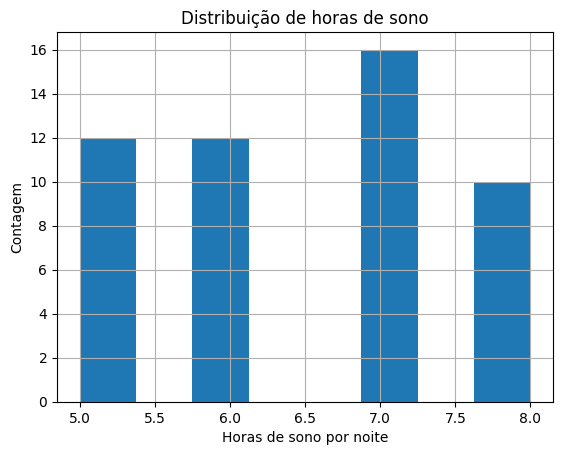

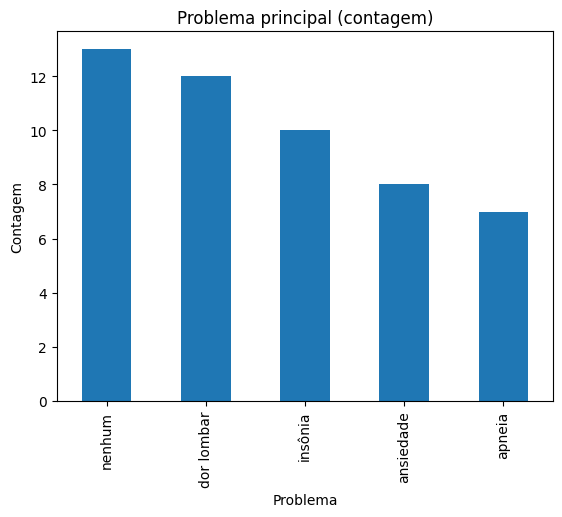

<Figure size 640x480 with 0 Axes>

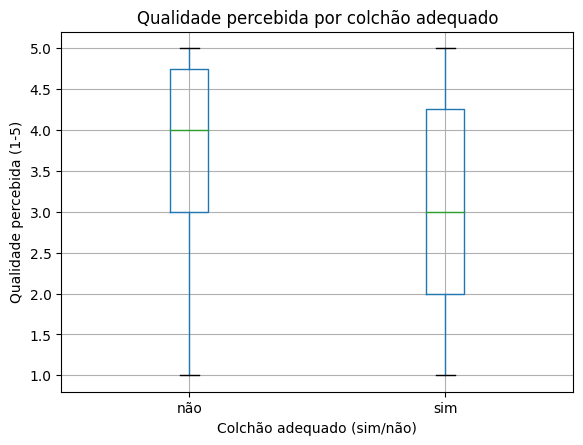

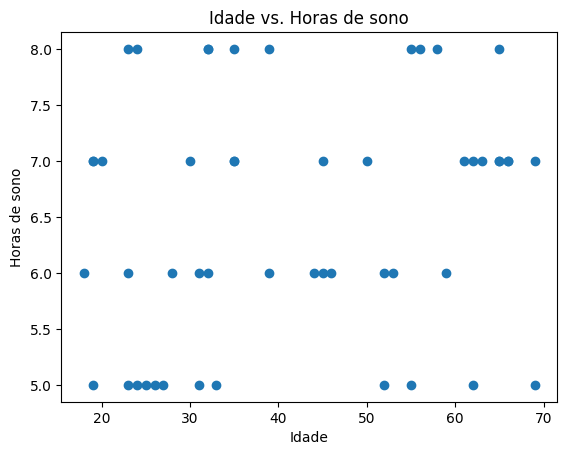


Insights r√°pidos:
- media_horas_sono: 6.48
- mediana_horas_sono: 7.0
- problema_mais_comum: nenhum
- proporcao_com_colchao_adequado: 0.64


In [3]:
# ================================
# Lamimir ‚Äî An√°lise do Sono (2025)
# ================================
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carregar dados (use o mesmo path que voc√™ j√° validou)
path = "/kaggle/input/panorama-do-sono-no-brasil-lamimir-2025/lamimir_panorama_sono_2025.csv"
df = pd.read_csv(path)

# 2) Vis√£o geral
print("Amostra (head):")
display(df.head())
print("\nInfo:")
df.info()
print("\nEstat√≠sticas descritivas:")
display(df.describe(include='all'))

# 3) Gr√°fico 1 ‚Äî Distribui√ß√£o de horas de sono
plt.figure()
df['horas_sono'].hist(bins=8)
plt.title('Distribui√ß√£o de horas de sono')
plt.xlabel('Horas de sono por noite')
plt.ylabel('Contagem')
plt.show()

# 4) Gr√°fico 2 ‚Äî Problema principal (contagem)
plt.figure()
df['problema_principal'].value_counts().plot(kind='bar')
plt.title('Problema principal (contagem)')
plt.xlabel('Problema')
plt.ylabel('Contagem')
plt.show()

# 5) Gr√°fico 3 ‚Äî Qualidade percebida x colch√£o adequado
plt.figure()
df.boxplot(column='qualidade_percebida', by='colchao_adequado')
plt.title('Qualidade percebida por colch√£o adequado')
plt.suptitle('')
plt.xlabel('Colch√£o adequado (sim/n√£o)')
plt.ylabel('Qualidade percebida (1-5)')
plt.show()

# 6) Gr√°fico 4 ‚Äî Idade vs. Horas de sono
plt.figure()
plt.scatter(df['idade'], df['horas_sono'])
plt.title('Idade vs. Horas de sono')
plt.xlabel('Idade')
plt.ylabel('Horas de sono')
plt.show()

# 7) Insights r√°pidos
insights = {
    "media_horas_sono": float(df['horas_sono'].mean()),
    "mediana_horas_sono": float(df['horas_sono'].median()),
    "problema_mais_comum": df['problema_principal'].mode()[0],
    "proporcao_com_colchao_adequado": float((df['colchao_adequado'] == 'sim').mean())
}
print("\nInsights r√°pidos:")
for k, v in insights.items():
    print(f"- {k}: {v}")


# üìå Conclus√£o

A an√°lise do dataset **‚ÄúPanorama do Sono no Brasil ‚Äî Lamimir (2025)‚Äù** mostra que:

- A maioria das pessoas dorme entre **6 e 7 horas por noite**, abaixo do ideal recomendado (7‚Äì9h).  
- **Ins√¥nia, dor lombar e ansiedade** aparecem como os problemas mais comuns.  
- A percep√ß√£o de qualidade do sono √© **mais alta entre quem utiliza colch√£o adequado**.  
- Existe uma varia√ß√£o de horas de sono conforme a idade, sugerindo padr√µes espec√≠ficos por faixa et√°ria.  

### üéØ Interpreta√ß√£o
Esses resultados refor√ßam que **a escolha do colch√£o** e a **aten√ß√£o √† sa√∫de do sono** impactam diretamente na disposi√ß√£o, bem-estar e desempenho di√°rio.  

### üåç Pr√≥ximos passos
Este dataset √© apenas **um exemplo educativo**. No futuro, pesquisas Lamimir com clientes e estudos ampliados poder√£o gerar insights ainda mais profundos sobre sono no Brasil.  

---

# üåç English Summary

The analysis of the **‚ÄúPanorama of Sleep in Brazil ‚Äî Lamimir (2025)‚Äù** dataset shows:

- Most people sleep between **6 and 7 hours per night**, below the recommended 7‚Äì9h.  
- **Insomnia, back pain, and anxiety** are the most common problems.  
- Perceived sleep quality is **higher among those with an adequate mattress**.  
- Sleep hours vary by age, suggesting different patterns for each group.  

### üéØ Interpretation
These results highlight that **mattress choice** and **sleep health awareness** directly impact daily performance, wellbeing, and long-term health.  

### üåç Next steps
This dataset is an **educational example**. In the future, Lamimir‚Äôs research with clients and extended studies will provide even deeper insights about sleep in Brazil.  
